# Separability index

In [1]:
import numpy as np
from scipy.stats import multivariate_normal
from separability_index import get_lambda
from separability_index import get_SI
import matplotlib.pyplot as plt

## Create synthetic data

In [2]:
N1 = 1000
N2 = 1000

mu_C1  = np.asarray([0,0])
mu_C2  = np.asarray([1.5,0])

cov_C1 = np.asarray([[1, 0.5],[ 0.5,1]])
cov_C2 = np.asarray([[1,-0.5],[-0.5,1]])

In [3]:
dataset1   = np.exp(np.random.multivariate_normal(mu_C1, cov_C1, size=N1))
dataset2   = np.exp(np.random.multivariate_normal(mu_C2, cov_C2, size=N2))
dataset1_x = dataset1[:,0]
dataset1_y = dataset1[:,1]
dataset2_x = dataset2[:,0]
dataset2_y = dataset2[:,1]

## Compute best lambda to make data normally distributed (Box-Cox transform)

In [4]:
lambda_data    = get_lambda(dataset1,dataset2)
dataset1_x_box = (dataset1_x**lambda_data[0]-1)/lambda_data[0]
dataset2_x_box = (dataset2_x**lambda_data[0]-1)/lambda_data[0]
dataset1_y_box = (dataset1_y**lambda_data[1]-1)/lambda_data[1]
dataset2_y_box = (dataset2_y**lambda_data[1]-1)/lambda_data[1]

## Computer separability index (SI)

In [5]:
SI = get_SI(dataset1_x_box,dataset1_y_box,dataset2_x_box,dataset2_y_box)
print('Separability Index = {:.4f}'.format(SI))

Separability Index = 0.5026


## Plot

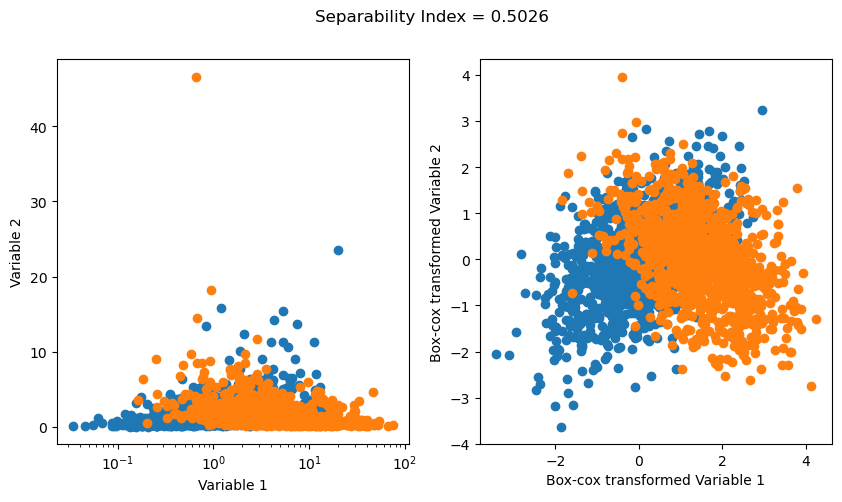

In [6]:
fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(10,5))

ax[0].scatter(dataset1.T[0],dataset1.T[1])
ax[0].scatter(dataset2.T[0],dataset2.T[1])
ax[1].scatter(dataset1_x_box,dataset1_y_box)
ax[1].scatter(dataset2_x_box,dataset2_y_box)

ax[0].set_xscale('log')
ax[0].set_ylabel('Variable 2')
ax[0].set_xlabel('Variable 1')
ax[0].set_ylabel('Variable 2')
ax[1].set_xlabel('Box-cox transformed Variable 1')
ax[1].set_ylabel('Box-cox transformed Variable 2')

plt.suptitle('Separability Index = {:.4f}'.format(SI));